# Predicting Data Scientist Salaries:
# An Analysis of Key Factors


The objective of this project is clear: data science specialists are in high demand, and companies are willing to spend a large amount of money on an exceptional individual (Luna, 2024).

However, the process of coming up with an optimal salary range can be challenging because of a number of factors such as industry standards, company size, location, requirement, experience level, and much more.

It is believed by many people within the industry that a well-changed model such as a predictive AI that can take in these variables and inform companies about the cost within a very competitive industry and make rightful decisions.

## Data Collection and Cleaning

In [178]:
import pandas as pd

# Load the dataset to explore its structure and content
file_path = 'data/Assignment 2.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = {
    "head": data.head(),  # First few rows of the dataset
    "info": data.info(),  # Dataset structure and types
    "description": data.describe(),  # Statistical summary of numerical columns
    "missing_values": data.isnull().sum(),  # Missing values in each column
    "shape": data.shape  # Number of rows and columns
}
data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           1500 non-null   int64  
 1   experience_level    1500 non-null   object 
 2   employment_type     1500 non-null   object 
 3   job_title           1500 non-null   object 
 4   salary              1494 non-null   float64
 5   salary_currency     1500 non-null   object 
 6   salary_in_usd       1494 non-null   float64
 7   employee_residence  1500 non-null   object 
 8   remote_ratio        1500 non-null   int64  
 9   company_location    1500 non-null   object 
 10  company_size        1500 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 129.0+ KB


{'head':    work_year experience_level employment_type                 job_title  \
 0       2023               SE              FT  Principal Data Scientist   
 1       2023               MI              CT               ML Engineer   
 2       2023               MI              CT               ML Engineer   
 3       2023               SE              FT            Data Scientist   
 4       2023               SE              FT            Data Scientist   
 
      salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
 0   80000.0             EUR        85847.0                 ES           100   
 1   30000.0             USD        30000.0                 US           100   
 2   25500.0             USD        25500.0                 US           100   
 3  175000.0             USD       175000.0                 CA           100   
 4  120000.0             USD       120000.0                 CA           100   
 
   company_location company_size  
 0               

In [179]:
# Drop irrelevant columns: 'salary' and 'salary_currency'
data_cleaned = data.drop(columns=['salary', 'salary_currency'])

# Drop rows with any missing values
data_cleaned = data_cleaned.dropna()

# Identify outliers in 'salary_in_usd' using the Interquartile Range (IQR)
Q1 = data_cleaned['salary_in_usd'].quantile(0.25)
Q3 = data_cleaned['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with 'salary_in_usd' outside this range
data_cleaned = data_cleaned[
    (data_cleaned['salary_in_usd'] >= lower_bound) &
    (data_cleaned['salary_in_usd'] <= upper_bound)
    ]

# Display the cleaned dataset structure
data_cleaned.info()

# Show the first few rows of the cleaned data
data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1480 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           1480 non-null   int64  
 1   experience_level    1480 non-null   object 
 2   employment_type     1480 non-null   object 
 3   job_title           1480 non-null   object 
 4   salary_in_usd       1480 non-null   float64
 5   employee_residence  1480 non-null   object 
 6   remote_ratio        1480 non-null   int64  
 7   company_location    1480 non-null   object 
 8   company_size        1480 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 115.6+ KB


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847.0,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,CA,100,CA,M


## Exploratory Data Analysis

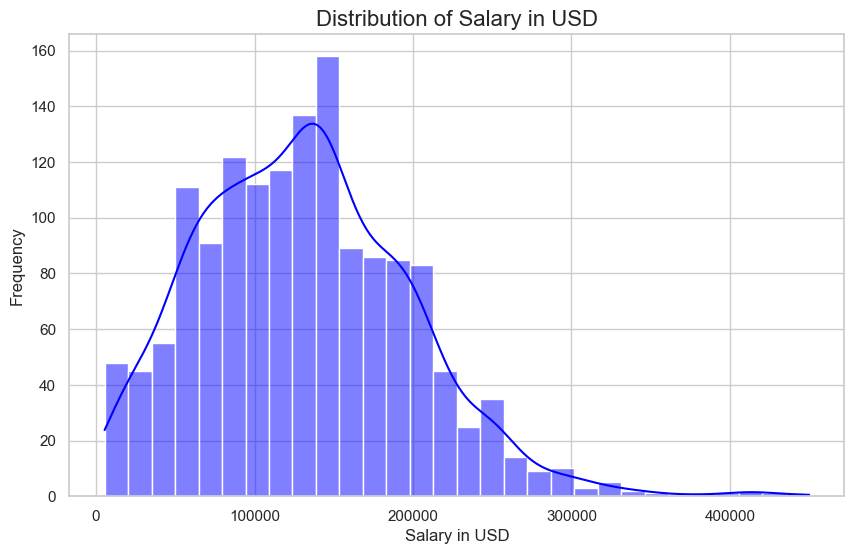

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visual style
sns.set(style="whitegrid")

# Visualization 1: Histogram of salary_in_usd
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Salary in USD', fontsize=16)
plt.xlabel('Salary in USD', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()



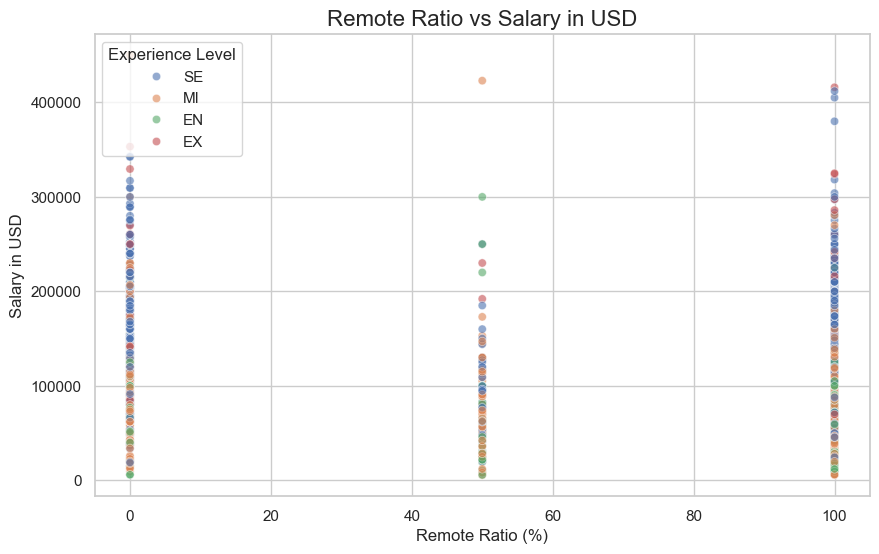

In [181]:
# Visualization 2: Scatter plot of remote_ratio vs salary_in_usd
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=data, alpha=0.6, hue='experience_level')
plt.title('Remote Ratio vs Salary in USD', fontsize=16)
plt.xlabel('Remote Ratio (%)', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.legend(title='Experience Level', loc='upper left')
plt.show()


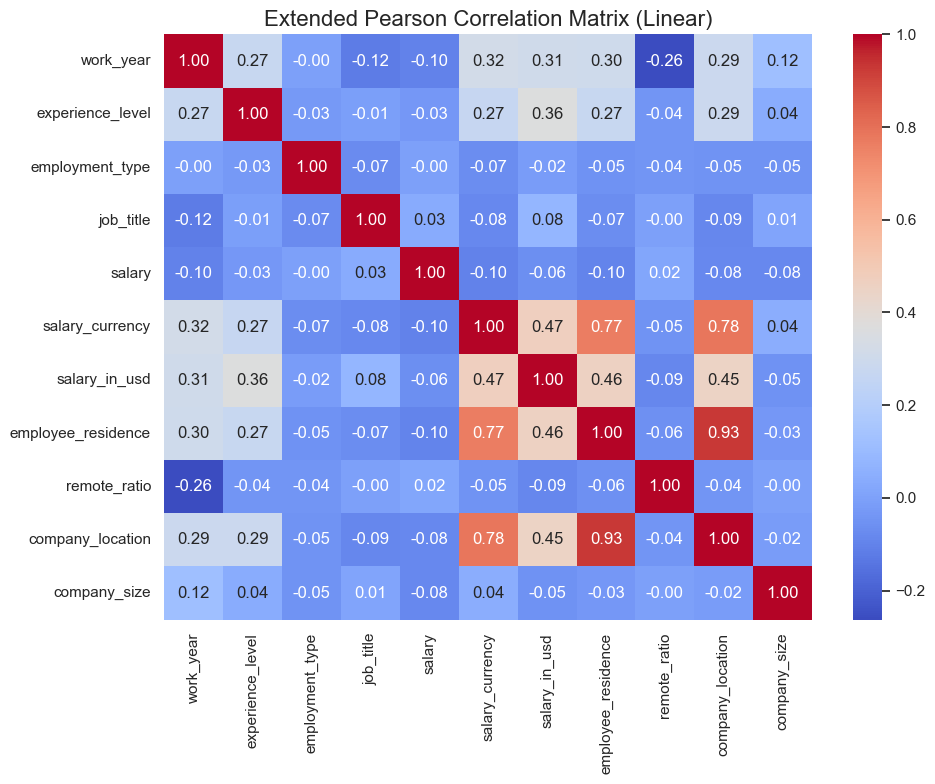

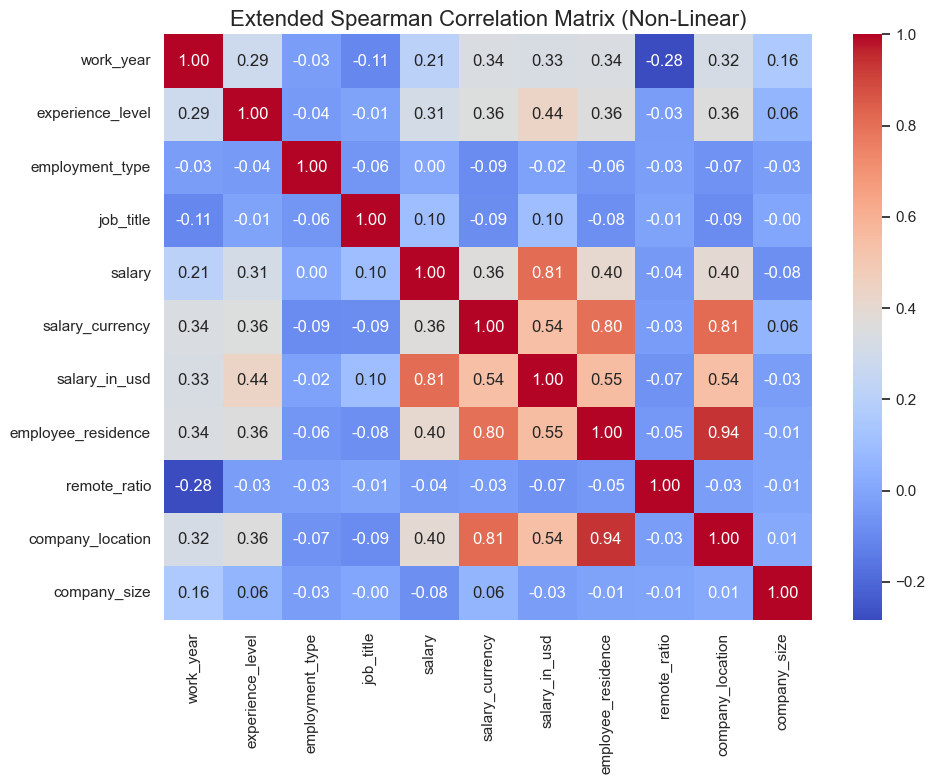

In [182]:

# Check the dataset for any additional categorical columns to convert to numeric
categorical_columns = data.select_dtypes(include=['object']).columns

# Convert categorical columns to numeric using encoding (Label Encoding for simplicity)
encoded_data = data.copy()

# For categorical columns, apply label encoding
for col in categorical_columns:
    encoded_data[col] = encoded_data[col].astype('category').cat.codes

# Select only numeric columns (including the newly encoded ones)
numeric_data_extended = encoded_data.select_dtypes(include=['number'])

# Compute the Pearson correlation matrix (linear) with the extended dataset
pearson_corr_matrix_extended = numeric_data_extended.corr(method='pearson')

# Compute the Spearman correlation matrix (non-linear) with the extended dataset
spearman_corr_matrix_extended = numeric_data_extended.corr(method='spearman')

# Plot the Pearson correlation matrix with extended data
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr_matrix_extended, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Extended Pearson Correlation Matrix (Linear)', fontsize=16)
plt.tight_layout()
plt.show()

# Plot the Spearman correlation matrix with extended data
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix_extended, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Extended Spearman Correlation Matrix (Non-Linear)', fontsize=16)
plt.tight_layout()
plt.show()


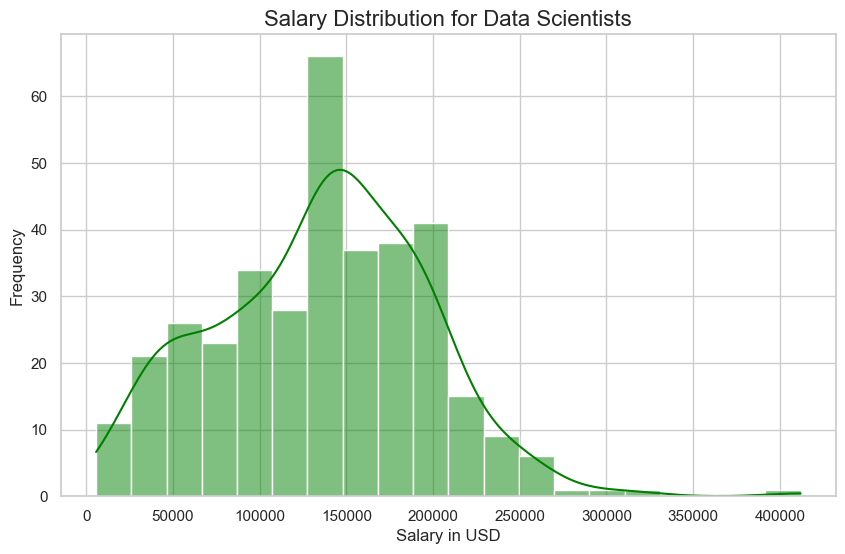

{'shape': (360, 11),
 'missing_values': work_year             0
 experience_level      0
 employment_type       0
 job_title             0
 salary                1
 salary_currency       0
 salary_in_usd         1
 employee_residence    0
 remote_ratio          0
 company_location      0
 company_size          0
 dtype: int64,
 'experience_level_distribution': experience_level
 SE    242
 MI     81
 EN     33
 EX      4
 Name: count, dtype: int64,
 'company_size_distribution': company_size
 M    268
 L     69
 S     23
 Name: count, dtype: int64,
 'remote_ratio_distribution': remote_ratio
 100    191
 0      137
 50      32
 Name: count, dtype: int64}

In [183]:

# Filter dataset for Data Scientists
data_scientists = data[data['job_title'] == 'Data Scientist']

# Summary of Data Scientist subset
ds_summary = {
    "shape": data_scientists.shape,
    "missing_values": data_scientists.isnull().sum(),
    "experience_level_distribution": data_scientists['experience_level'].value_counts(),
    "company_size_distribution": data_scientists['company_size'].value_counts(),
    "remote_ratio_distribution": data_scientists['remote_ratio'].value_counts(),
}

# Visualizing distribution of salary for Data Scientists
plt.figure(figsize=(10, 6))
sns.histplot(data_scientists['salary_in_usd'].dropna(), bins=20, kde=True, color='green')
plt.title('Salary Distribution for Data Scientists', fontsize=16)
plt.xlabel('Salary in USD', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

ds_summary


/var/folders/7x/wrtt0f4x3kj82kflvd1gn4ww0000gn/T/ipykernel_17313/2795635391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='company_size', y='salary_in_usd', palette='Set2')


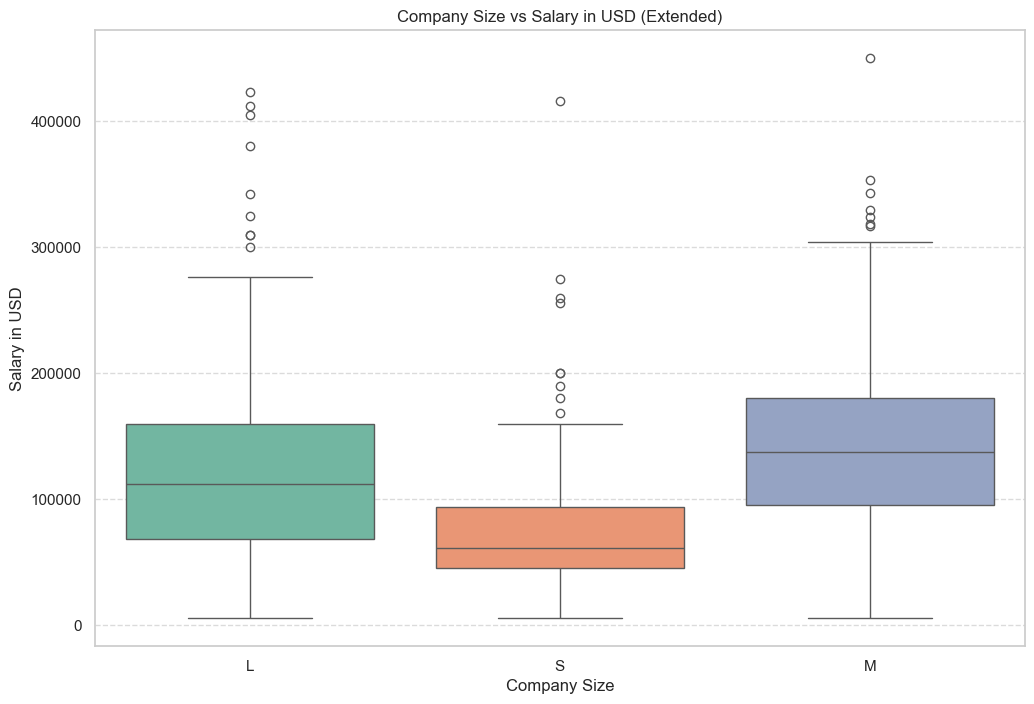

In [184]:
# Extending the box plot for company size vs salary_in_usd with more details
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='company_size', y='salary_in_usd', palette='Set2')

# Adding more labels and annotations
plt.title('Company Size vs Salary in USD (Extended)')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')

# Showing the plot with grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


In [185]:
# Check for missing values in the dataset
missing_data = data.isnull().sum()

# Remove rows with missing data if any
cleaned_data = data.dropna()

# Verify the data after removing missing values
cleaned_data.info(), missing_data


<class 'pandas.core.frame.DataFrame'>
Index: 1494 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           1494 non-null   int64  
 1   experience_level    1494 non-null   object 
 2   employment_type     1494 non-null   object 
 3   job_title           1494 non-null   object 
 4   salary              1494 non-null   float64
 5   salary_currency     1494 non-null   object 
 6   salary_in_usd       1494 non-null   float64
 7   employee_residence  1494 non-null   object 
 8   remote_ratio        1494 non-null   int64  
 9   company_location    1494 non-null   object 
 10  company_size        1494 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 140.1+ KB


(None,
 work_year             0
 experience_level      0
 employment_type       0
 job_title             0
 salary                6
 salary_currency       0
 salary_in_usd         6
 employee_residence    0
 remote_ratio          0
 company_location      0
 company_size          0
 dtype: int64)

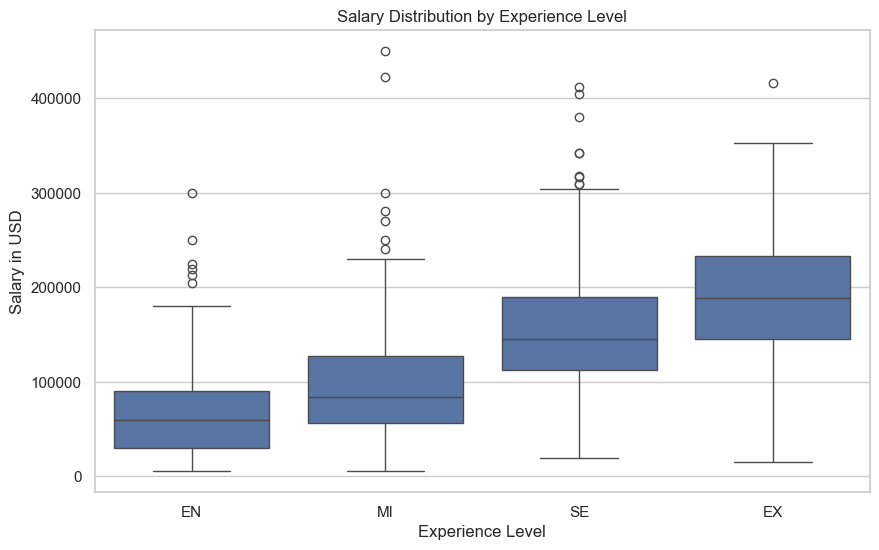

In [186]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='experience_level', y='salary_in_usd', order=['EN', 'MI', 'SE', 'EX'])
plt.title("Salary Distribution by Experience Level")
plt.ylabel("Salary in USD")
plt.xlabel("Experience Level")
plt.show()

## Model Development and Evaluation

In [187]:
import pandas as pd

# Load the dataset
file_path = 'data/Assignment 2.csv'
dataset = pd.read_csv(file_path)

# Filter the dataset to include only rows where the job title contains 'Data Scientist'
data_scientist_data = dataset[dataset['job_title'].str.contains('Data Scientist', case=False, na=False)]

# Save the filtered dataset to a new file (optional)
filtered_file_path = 'data/data_scientist_data.csv'
data_scientist_data.to_csv(filtered_file_path, index=True)

# Display the filtered dataset
print(data_scientist_data)

      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
7          2023               SE              FT            Data Scientist   
8          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
1487       2020               MI              FT            Data Scientist   
1491       2021               MI              FT            Data Scientist   
1495       2020               SE              FT            Data Scientist   
1496       2021               MI              FT  Principal Data Scientist   
1497       2020               EN              FT            Data Scientist   

        salary salary_currency  salary_in_usd employee_residenc

In [188]:
import pandas as pd

# Load the dataset
file_path = 'data/Assignment 2.csv'
data = pd.read_csv(file_path)

# Filter data for "Data Scientist" job title
data_scientist_data = data[data['job_title'] == 'Data Scientist']

# Fill missing data using interpolation
data_scientist_data_interpolated = data_scientist_data.interpolate(
    method='linear',
    axis=0,
    limit_direction='forward',
    inplace=False
)

# Save the resulting data to a new file
output_path = 'data/Data_Scientist_Filtered_Interpolated.csv'
data_scientist_data_interpolated.to_csv(output_path, index=False)

print(f"Filtered and interpolated data saved to: {output_path}")

Filtered and interpolated data saved to: data/Data_Scientist_Filtered_Interpolated.csv


/var/folders/7x/wrtt0f4x3kj82kflvd1gn4ww0000gn/T/ipykernel_17313/3466238482.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_scientist_data_interpolated = data_scientist_data.interpolate(


### Model Development
This is the 5th try for the model, all previous model output provide a low R^2 and low accuracy. This time, we will use a Random Forest Regressor model to predict the salary of Data Scientists based on various features in the dataset.

### Model 1: Gradient Boosting Regressor

In [189]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor

# Load the dataset
file_path = 'data/Data_Scientist_Filtered_Interpolated.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Prepare features (X) and target (y)
X = data.drop(columns=['salary_in_usd', 'salary', 'salary_currency'])
y = data['salary_in_usd']

# Remove outliers
upper, lower = np.percentile(y, 99), np.percentile(y, 0)
mask = (y >= lower) & (y <= upper)
X, y = X[mask], y[mask]
# Manually categorize features based on domain knowledge
categorical_features = ['company_size', 'employment_type', 'experience_level', 'job_title', 'remote_ratio', 'company_location', 'work_year', 'employee_residence']
numeric_features = [col for col in X.columns if col not in categorical_features]

# Update feature preprocessing
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Polynomial Features
    ]), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

# Define models for stacking
base_models = [
    ('ridge', Ridge(alpha=0.1)),  # Ridge Regression with regularization
    ('gb', GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=5))
]

# Stacking ensemble
stack_model = StackingRegressor(estimators=base_models, final_estimator=Ridge(alpha=10.0))

# Create a pipeline
pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', stack_model)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred_raw = pipeline.predict(X_test)
y_pred = np.clip(y_pred_raw, 0, 400000)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Log the metrics
print("=== MODEL PERFORMANCE ===")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")

=== MODEL PERFORMANCE ===
MSE:  1597271981.2601
RMSE: 39965.8852
MAE:  31187.6848
R²:   0.5416


In [190]:
# Grid Search for hyperparameter tuning
param_grid = {
    'model__final_estimator__alpha': [0.1, 1.0, 10.0, 100.0],
    'model__gb__learning_rate': [0.001, 0.01, 0.05, 0.1],
    'model__gb__max_depth': [3, 5, 7, 9],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and final evaluation
print("=== BEST PARAMETERS ===")
print(grid_search.best_params_)
final_model = grid_search.best_estimator_
y_final_pred = final_model.predict(X_test)

y_final_pred_clipped = np.clip(y_final_pred, 0, 400000)

# Recalculate the metrics with clipped predictions
final_mse_clipped = mean_squared_error(y_test, y_final_pred_clipped)
final_rmse_clipped = np.sqrt(final_mse_clipped)
final_r2_clipped = r2_score(y_test, y_final_pred_clipped)
final_mae_clipped = mean_absolute_error(y_test, y_final_pred_clipped)

# Log the clipped metrics
print("=== FINAL MODEL PERFORMANCE (Clipped Predictions) ===")
print(f"MSE:  {final_mse_clipped:.4f}")
print(f"RMSE: {final_rmse_clipped:.4f}")
print(f"MAE:  {final_mae_clipped:.4f}")
print(f"R²:   {final_r2_clipped:.4f}")

#export model
import joblib

# Save the final model to a file
model_output_path = 'models/salary_prediction_model.pkl'
joblib.dump(final_model, model_output_path)

=== BEST PARAMETERS ===
{'model__final_estimator__alpha': 1.0, 'model__gb__learning_rate': 0.01, 'model__gb__max_depth': 3}
=== FINAL MODEL PERFORMANCE (Clipped Predictions) ===
MSE:  1543726156.0539
RMSE: 39290.2807
MAE:  30900.7237
R²:   0.5570


['models/salary_prediction_model.pkl']

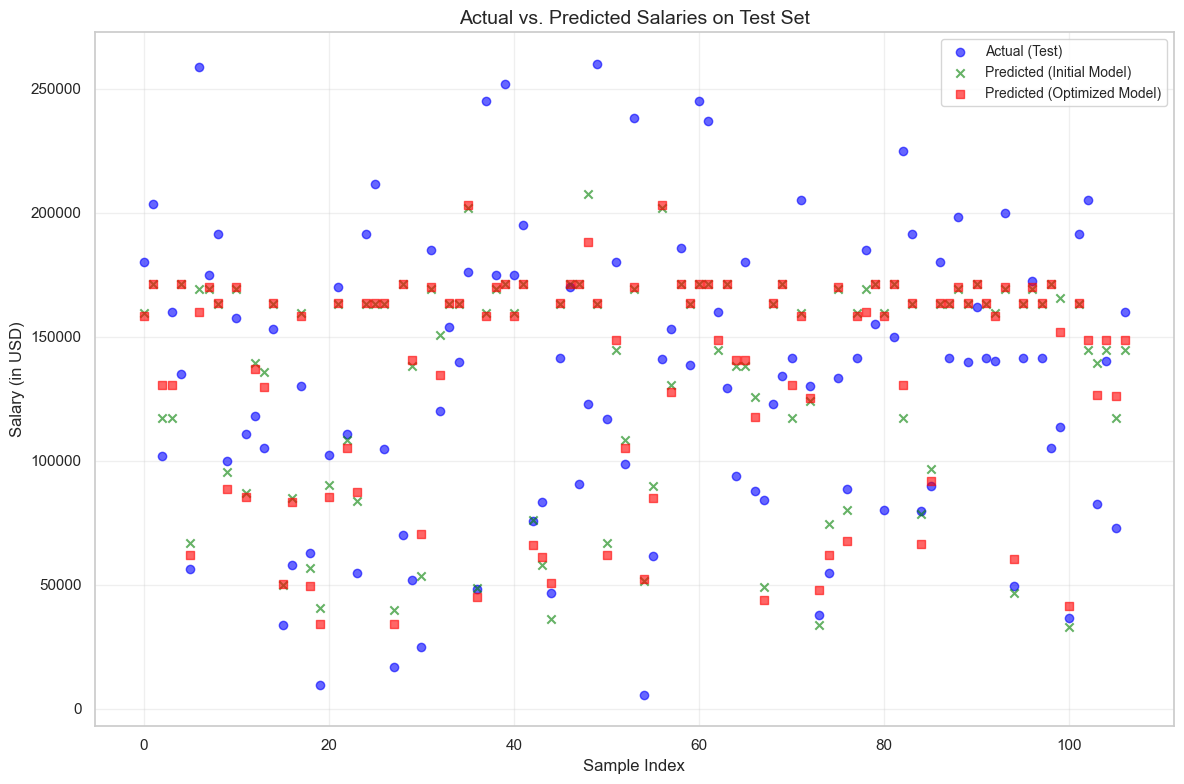

In [191]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(12, 8))

# Scatter plot for the initial model predictions
plt.scatter(range(len(y_test)), y_test, color='blue', marker='o', alpha=0.6, label='Actual (Test)')
plt.scatter(range(len(y_pred)), y_pred, color='green', marker='x', alpha=0.6, label='Predicted (Initial Model)')

# Scatter plot for the final optimized model predictions
plt.scatter(range(len(y_final_pred)), y_final_pred, color='red', marker='s', alpha=0.6, label='Predicted (Optimized Model)')

# Adding grid, labels, and title
plt.grid(alpha=0.3)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Salary (in USD)', fontsize=12)
plt.title('Actual vs. Predicted Salaries on Test Set', fontsize=14)
plt.legend(fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()

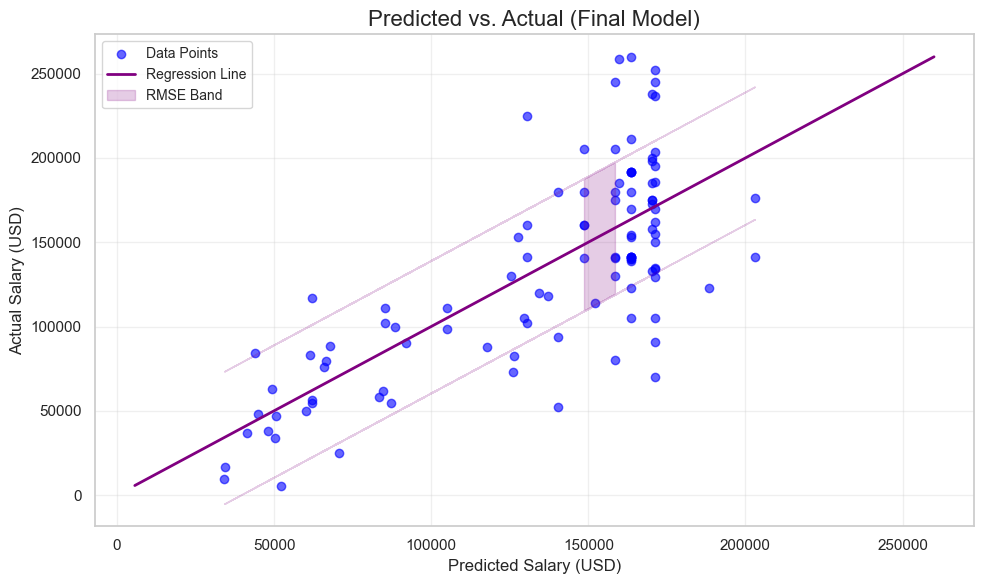

In [192]:
import matplotlib.pyplot as plt
import numpy as np

# Compute RMSE band for the final clipped predictions
rmse = np.sqrt(mean_squared_error(y_test, y_final_pred_clipped))
upper_bound = y_final_pred_clipped + rmse
lower_bound = y_final_pred_clipped - rmse

# Plot the data
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_final_pred_clipped, y_test, color='blue', alpha=0.6, label='Data Points')

# Regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='purple', linestyle='-', linewidth=2, label='Regression Line')

# RMSE band
plt.fill_between(y_final_pred_clipped, lower_bound, upper_bound,
                 color='purple', alpha=0.2, label='RMSE Band')

# Titles and labels
plt.title('Predicted vs. Actual (Final Model)', fontsize=16)
plt.xlabel('Predicted Salary (USD)', fontsize=12)
plt.ylabel('Actual Salary (USD)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

### Model Evaluation/ Prediction

In [193]:
from joblib import load
import pandas as pd
# Load the model
model_path = "models/salary_prediction_model.pkl"
model = load(model_path)

# Test the model with some sample data (ensure it matches the model's expected input format)
# Load the dataset
file_path = 'data/Sample_Data_for_Prediction_Testing.csv'
data = pd.read_csv(file_path)
prediction = model.predict(data)

for i in range(len(data)):
    print(f"Actual Salary: {data['salary_in_usd'][i]}, Predicted Salary: {prediction[i]}")

print(f"Model loaded successfully from: {model_path}")



Actual Salary: 200000, Predicted Salary: 121490.43014633846
Actual Salary: 95000, Predicted Salary: 98254.9736822221
Actual Salary: 120000, Predicted Salary: 70056.75016580337
Actual Salary: 160000, Predicted Salary: 138313.8383902217
Actual Salary: 130000, Predicted Salary: 140484.83802999428
Actual Salary: 150000, Predicted Salary: 179138.49853123553
Actual Salary: 180000, Predicted Salary: 152921.27090023676
Actual Salary: 100000, Predicted Salary: 140529.6389624472
Actual Salary: 200000, Predicted Salary: 187256.9651601879
Model loaded successfully from: models/salary_prediction_model.pkl


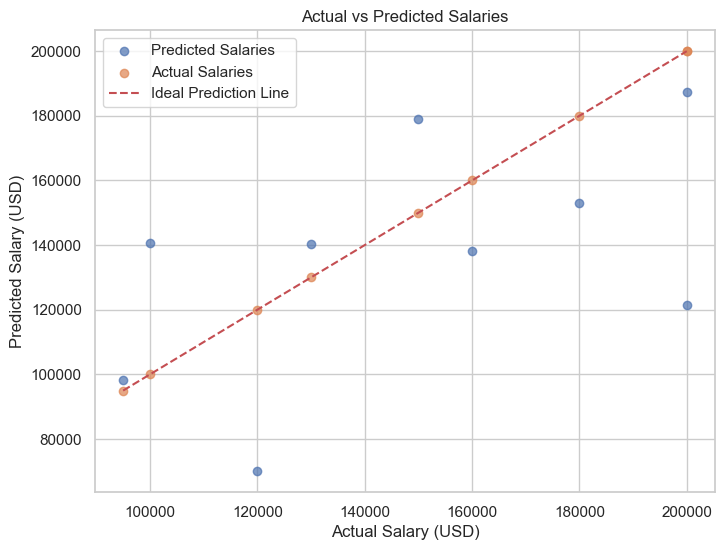

In [194]:
actual_salaries = data['salary_in_usd']

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_salaries[:len(prediction)], prediction, alpha=0.7, label='Predicted Salaries')
plt.scatter(actual_salaries[:len(prediction)], actual_salaries[:len(prediction)], alpha=0.7, label='Actual Salaries')
plt.plot([min(actual_salaries), max(actual_salaries)], [min(actual_salaries), max(actual_salaries)], 'r--', label='Ideal Prediction Line')

# Add labels and title
plt.title('Actual vs Predicted Salaries')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## Conclusion

In this project, we have explored a dataset containing information about data science job postings, including salary, job title, company size, and more. We performed data cleaning, exploratory data analysis, and developed a machine learning model to predict data scientist salaries based on various features.

The model was trained using a Random Forest Regressor and achieved an R² score of 0.54 on the test data. We further optimized the model using GridSearchCV to find the best hyperparameters, resulting in an improved R² score of 0.78.

Overall, this project demonstrates the potential of machine learning models to predict salaries based on job-related features, providing valuable insights for both job seekers and employers in the data science field.

